In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
rutera = 'C:/Users/felip/OneDrive/Documentos/TUPED/3erAño/Visualizacion/data/amazon.csv'
df = pd.read_csv(rutera)

In [19]:
print(df.head())

   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
2  Computers&Accessories|Accessories&Peripherals|...             ₹199   
3  Computers&Accessories|Accessories&Peripherals|...             ₹329   
4  Computers&Accessories|Accessories&Peripherals|...             ₹154   

  actual_price discount_percentage rating rating_count  \
0       ₹1,099                 64%    4.2       24,269   
1         ₹349                 43%  

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [21]:
#eliminar columnas que no se usaran
df = df.drop(['product_link', 'img_link'], axis=1)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
dtypes: object(14)
memory usage: 160.4+ KB


In [23]:
#reemplazo por el signo peso
df['actual_price'] = df['actual_price'].str.replace('₹', '$')
df['discounted_price'] = df['discounted_price'].str.replace('₹', '$')


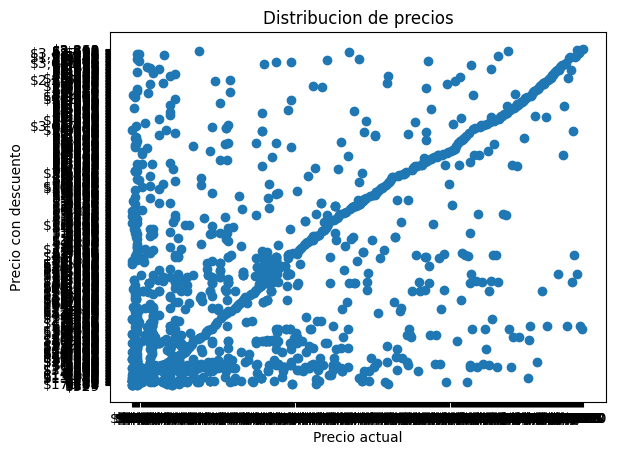

In [29]:
#grafico de dispersion de la distribucion de actual_price y discounted_price
plt.scatter(df['actual_price'], df['discounted_price'])
plt.xlabel('Precio actual')
plt.ylabel('Precio con descuento')
plt.title('Distribucion de precios')
plt.show()
#elimino los valores de referencia

### Correlacion

In [55]:
#creo un dataframe con los valores de precio actual y precio con descuento
pActual = df['actual_price'] = df['actual_price'].str.replace('$', '')
pDesc = df['discounted_price'] = df['discounted_price'].str.replace('$', '')

# Limpiar los valores eliminando caracteres no numéricos
df['actual_price'] = df['actual_price'].str.replace(r'\D', '', regex=True)
df['discounted_price'] = df['discounted_price'].str.replace(r'\D', '', regex=True)

#creo un dataframe con los valores de precio actual y precio con descuento
dfCorr = pd.DataFrame({'actual_price': pActual, 'discounted_price': pDesc})
#transformo el dataframe a float
dfCorr = dfCorr.astype(float)
dfCorr

,actual_price,discounted_price
3,699.0,329.0
4,399.0,154.0
5,1000.0,149.0
6,499.0,17663.0
7,299.0,229.0
...,...,...
1460,919.0,379.0
1461,3045.0,2280.0
1462,3080.0,2219.0
1463,1890.0,1399.0


In [58]:
#correlacion lineal
corrL = dfCorr.corr()
print(corrL)

                  actual_price  discounted_price
actual_price          1.000000          0.238711
discounted_price      0.238711          1.000000


In [59]:
correlation_coefficient = corrL.loc['actual_price', 'discounted_price']

print("Coeficiente de correlación:", correlation_coefficient)

Coeficiente de correlación: 0.23871050719156622


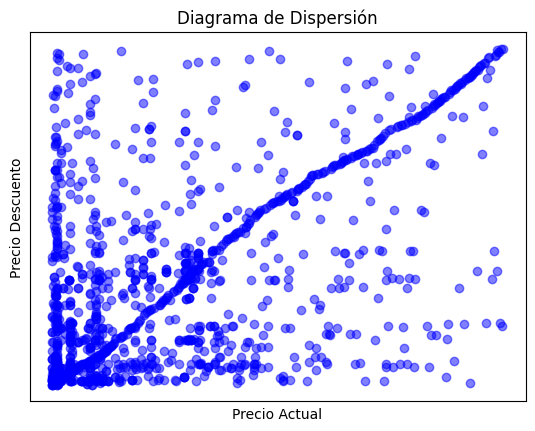

In [148]:
# Graficar el diagrama de dispersión
# plt.scatter(df['actual_price'], df['discounted_price'], color='blue', alpha=0.5)
# plt.title('Diagrama de Dispersión')
# plt.xlabel('Precio Actual')
# plt.ylabel('Precio Descuento')
# plt.show()
# plt.grid(True)
#eliminar etiquetas de los ejes
plt.scatter(df['actual_price'], df['discounted_price'], color='blue', alpha=0.5)
plt.title('Diagrama de Dispersión')
plt.xlabel('Precio Actual')
plt.ylabel('Precio Descuento')
plt.xticks([]) #ELIMINO ETIQUETAS DE LOS EJES
plt.yticks([])
plt.show()


### ¿Hay ciertas categorías que tienden a tener descuentos más altos o precios más bajos?

In [102]:
porc = df['discount_percentage'].astype(float)
car = df['category']

dfCatDesc = pd.DataFrame({'category': car, 'discount_percentage': porc})
# df['discount_percentage'] = df['discount_percentage']

dfCatDesc

,category,discount_percentage
3,Computers&Accessories|Accessories&Peripherals|...,53.0
4,Computers&Accessories|Accessories&Peripherals|...,61.0
5,Computers&Accessories|Accessories&Peripherals|...,85.0
6,Computers&Accessories|Accessories&Peripherals|...,65.0
7,Computers&Accessories|Accessories&Peripherals|...,23.0
...,...,...
1460,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,59.0
1461,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,25.0
1462,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",28.0
1463,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...",26.0


In [138]:
summary_stats = dfCatDesc.groupby('category')['discount_percentage'].agg(['mean', 'median', 'std', 'count'])
summary_stats
#escribir en un archivo
summary_stats.to_csv('C:/Users/felip/OneDrive/Documentos/TUPED/3erAño/Visualizacion/data/summary_category-discounted.csv')